Импортируем наш класс

In [2]:
%timeit from movielens_analysis import Links, Ratings, Movies, Tags
from movielens_analysis import Links, Ratings, Movies, Tags


348 ns ± 25.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Считываем наши данные

In [3]:
%timeit Links("../datasets/links.csv")
links = Links ("../datasets/links.csv")

1.38 ms ± 48.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%timeit Ratings()
ratings = Ratings()

%timeit Ratings.Movies(ratings)
%timeit Ratings.Users(ratings)
movie_rating = Ratings.Movies(ratings)
user_rating = Ratings.Users(ratings)

54.3 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
194 ns ± 6.01 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
265 ns ± 3.59 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [5]:
%timeit Movies("../datasets/movies.csv")
movies = Movies("../datasets/movies.csv")

8.4 ms ± 53.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit Tags("../datasets/tags.csv")
tags = Tags("../datasets/tags.csv")

5.85 ms ± 366 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


---
## Ежегодный отчет команды аналитиков MovieLens

### *Прошел календарный год, а значит две ночи наша команда аналитиков не спала и в поту пыталась сдать то, что должна была готовить на протяжении всего этого года. Давайте же глянем на то, что мы натворили за это время, проанализируем некоторые данные и может даже что то выясним!*

## Тэги 

### На протяжении всего года мы чщательно записывали все тэги и заметки наших пользователей, включая тайм-коды и фильм, которому эта заметка предназначалась. На основе этого мы решили найти некоторые уникальные записи и ~~как следует посмеяться~~ собрать информацию о запомнившихся моментах из фильмов наших пользователей. 

### Нам стало интересно, насколько детализованно наши зрители подходят к оформлению тэгов, и мы решили собрать для вас ТОП-10 самых длинных тегов.

In [7]:
%timeit tags.most_words(10)
most_words = tags.most_words(10)
for i, key in enumerate(most_words.keys()):
    print(f"TOP -{i+1:2}: {key}")

196 μs ± 4.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
TOP - 1: Something for everyone in this one... saw it without and plan on seeing it with kids!
TOP - 2: the catholic church is the most corrupt organization in history
TOP - 3: Oscar (Best Music - Original Score)
TOP - 4: Everything you want is here
TOP - 5: based on a true story
TOP - 6: seen more than once
TOP - 7: lord of the rings
TOP - 8: based on a book
TOP - 9: based on a play
TOP -10: political right versus left


### Среди них очень много хороших тегов, но мы решили выделить наших любимчиков
#### __"В этом фильме найдется что-то для каждого... мы смотрели его без детей и планируем посмотреть с ними!"__
Это прекрасное описание тэга "для всей семьи", мы уже задумываемся над заменой стандартного тега этим...

#### __"Католическая церковь - самая коррумпированная организация в истории"__
Воу, как резко, мы специально отпустим название фильма, чтобы вы сами смогли догадаться, о каком произведении идет речь.

### Теперь мы решили, что интересно было бы увидеть не просто многословные, а самые длинные теги

In [8]:
%timeit tags.longest(10)
most_words = tags.longest(10)
for i, word in enumerate(most_words):
    print(f"TOP -{i+1:2}: {word}")

47.6 μs ± 532 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
TOP - 1: Something for everyone in this one... saw it without and plan on seeing it with kids!
TOP - 2: the catholic church is the most corrupt organization in history
TOP - 3: audience intelligence underestimated
TOP - 4: Oscar (Best Music - Original Score)
TOP - 5: assassin-in-training (scene)
TOP - 6: Oscar (Best Cinematography)
TOP - 7: Everything you want is here
TOP - 8: political right versus left
TOP - 9: representation of children
TOP -10: artificial intelligence


Все так же видим наших любимчиков, но появился еще один
#### __"Интеллект аудитории недооценен"__
Этот тег отлично показывает фильмы, которые могут раздражать своими условностями, а потому мы очень часто его используем!


Для вашего удобства мы также решили оставить топ, составленный сразу из обоих критериев:

In [9]:
%timeit tags.most_words_and_longest(25)
most_words = tags.most_words_and_longest(25)
for i, word in enumerate(most_words):
    print(f"TOP -{i+1:2}: {word}")

4.94 ms ± 36.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
TOP - 1: Something for everyone in this one... saw it without and plan on seeing it with kids!
TOP - 2: the catholic church is the most corrupt organization in history
TOP - 3: Oscar (Best Music - Original Score)
TOP - 4: Oscar (Best Cinematography)
TOP - 5: Everything you want is here
TOP - 6: political right versus left
TOP - 7: representation of children
TOP - 8: Guardians of the Galaxy
TOP - 9: freedom of expression
TOP -10: based on a true story
TOP -11: sexy female scientist
TOP -12: heroine in tight suit
TOP -13: Francis Ford Coppola


Хватит баловаться, начнем со статистики. Представляем вам самые частые тэги!

In [10]:
%timeit tags.most_popular(25)
popular_tags = tags.most_popular(25)
for i, word in enumerate(popular_tags):
    print(f"TOP -{i+1:2}: {word.capitalize()}")

308 μs ± 11.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
TOP - 1: Funny
TOP - 2: Sci-fi
TOP - 3: Twist ending
TOP - 4: Action
TOP - 5: Dark comedy
TOP - 6: Atmospheric
TOP - 7: Comedy
TOP - 8: Suspense
TOP - 9: Superhero
TOP -10: Will ferrell
TOP -11: Leonardo dicaprio
TOP -12: Comic book
TOP -13: Satire
TOP -14: Psychology
TOP -15: Mindfuck
TOP -16: Thought-provoking
TOP -17: Animation
TOP -18: Adventure
TOP -19: Black comedy
TOP -20: Surreal
TOP -21: Predictable
TOP -22: Psychological
TOP -23: Creepy
TOP -24: Al pacino
TOP -25: Fantasy


Как и всегда, самыми популярными тегами остаются 
### Смешное, Sci-Fi, Экшены и Комедии

А раз уж Funny - наш самый популярный тег, мы решили посмотреть, сколько тегов, похожих на него

In [11]:
%timeit tags.tags_with("fun")
popular_tags = tags.tags_with("fun")
for i, word in enumerate(popular_tags):
    print(f"{i+1:2}: {word.capitalize()}")

20.4 μs ± 783 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
 1: Fun family movie
 2: Funny
 3: Stupid but funny
 4: Very funny


Какие искренние тэги, советуем украсить свой вечер фильмом с один из таких тэгов!

Теперь вы - наши пользователи. По традиции, мы награждаем самых активных из вас кусочком "ничего". Вот список победителей этого года!

In [12]:
%timeit tags.most_active_users(5)
active_users = tags.most_active_users(5)
for i, word in enumerate(active_users.items()):
    print(f"Place{i+1:2}: ID {word[0]:3} - {word[1]:3} установленных тэгов.")

215 μs ± 2.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Place 1: ID  62 - 370 установленных тэгов.
Place 2: ID 424 - 273 установленных тэгов.
Place 3: ID 125 -  48 установленных тэгов.
Place 4: ID 357 -  45 установленных тэгов.
Place 5: ID 318 -  41 установленных тэгов.


Если вы увидели здесь свое ID - напишите нам, чтобы получить приз!

А теперь номинация - самый затэганный фильм!

In [13]:
%timeit tags.most_tagged_movies(5)
tagged_movies = tags.most_tagged_movies(5)
for i, word in enumerate(tagged_movies.items()):
    print(f"Place{i+1:2}: ID {word[0]:6} - {word[1]:2} тэгов.")

301 μs ± 6.97 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Place 1: ID    260 - 23 тэгов.
Place 2: ID 135536 - 19 тэгов.
Place 3: ID  99114 - 11 тэгов.
Place 4: ID  48516 - 10 тэгов.
Place 5: ID 122912 - 10 тэгов.


## Фильмы 

### Мы наконец решили представить вам подробную статистику фильмов!

Начнем с распределения фильмов по годам!

In [14]:
%timeit movies.dist_by_release()
year_dist = movies.dist_by_release()
for data in year_dist.items():
    print(f"Год {data[0]}: {data[1]} ")

144 μs ± 306 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Год 1995: 224 
Год 1994: 184 
Год 1996: 181 
Год 1993: 101 
Год 1992: 23 
Год 1990: 15 
Год 1991: 15 
Год 1989: 14 
Год 1986: 9 
Год 1982: 8 
Год 1940: 8 
Год 1957: 8 
Год 1987: 8 
Год 1980: 8 
Год 1981: 7 
Год 1988: 7 
Год 1979: 7 
Год 1955: 6 
Год 1959: 6 
Год 1968: 6 
Год 1997: 6 
Год 1939: 6 
Год 1985: 6 
Год 1967: 5 
Год 1965: 5 
Год 1951: 5 
Год 1958: 5 
Год 1944: 5 
Год 1941: 5 
Год 1975: 5 
Год 1971: 5 
Год 1984: 5 
Год 1964: 4 
Год 1973: 4 
Год 1954: 4 
Год 1934: 4 
Год 1960: 4 
Год 1963: 4 
Год 1950: 4 
Год 1974: 4 
Год 1983: 4 
Год 1977: 3 
Год 1937: 3 
Год 1972: 3 
Год 1952: 3 
Год 1961: 3 
Год 1953: 3 
Год 1946: 3 
Год 1938: 3 
Год 1956: 3 
Год 1962: 3 
Год 1976: 2 
Год 1969: 2 
Год 1970: 2 
Год 1942: 2 
Год 1945: 2 
Год 1947: 2 
Год 1935: 2 
Год 1936: 2 
Год 1949: 2 
Год 1978: 2 
Год 1943: 1 
Год 1932: 1 
Год 1966: 1 
Год 1948: 1 
Год 1933: 1 
Год 1931: 1 


Лидирующими годами по произвоству фильмов все также остается 1995ый год! Вспомним прекрасные фильмы, которые тогда вышли!

In [15]:
%timeit movies.movies_by_year(1995)
for movie in movies.movies_by_year(1995)[:20]:
    print(movie)

29.8 μs ± 1.73 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)
American President, The (1995)
Dracula: Dead and Loving It (1995)
Balto (1995)
Nixon (1995)
Cutthroat Island (1995)
Casino (1995)
Sense and Sensibility (1995)
Four Rooms (1995)
Ace Ventura: When Nature Calls (1995)
Money Train (1995)


## Рейтинги

### Переходим к самому главному - рейтинги!

Обозначим самых активных режиссеров, тех, что выпустил больше всего фильмов

Метод top_directors(n) возвращает топ-N режиссеров по количеству фильмов. Например, n = 20:

In [16]:
%timeit links.top_directors(10)
directors = links.top_directors(10)
for director in directors.items():
    print(f"{director[0]}: {director[1]} фильмов")

2.42 ms ± 81.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Alfred Hitchcock: 11 фильмов
Woody Allen: 8 фильмов
Frank Capra: 6 фильмов
Stanley Kubrick: 6 фильмов
Robert Stevenson: 6 фильмов
Steven Spielberg: 5 фильмов
Rob Reiner: 5 фильмов
James Cameron: 5 фильмов
Martin Scorsese: 5 фильмов
John Carpenter: 5 фильмов


С ума стойти, 11 фильмов от Альфреда Хичкока! Все мы знаем его по таким культовым произведениям как
"В случае убийства, наберите 'М'" и другим прекрасным фильмам. Браво!


Увеличим обороты, посмотрим на самые дорогие фильмы!

In [17]:
%timeit links.most_expensive(10)
directors = links.most_expensive(10)
for director in directors.items():
    print(f"{director[0]}: {director[1]/1000000}млн$")

1.8 ms ± 87.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Акира: 1100.0млн$
Призрак в доспехах: 330.0млн$
Водный мир: 175.0млн$
Жерминаль: 164.0млн$
Холодная лихорадка: 130.0млн$
Правдивая ложь: 115.0млн$
Терминатор 2: Судный день: 102.0млн$
Сирано де Бержерак: 100.0млн$
Стиратель: 100.0млн$
Горбун из Нотр-Дама: 100.0млн$


Больше миллиарда долларов ушло на производство "Акиры"! Каждый кадр этого аниме стоит своих денег. Советуем вам глянуть его!

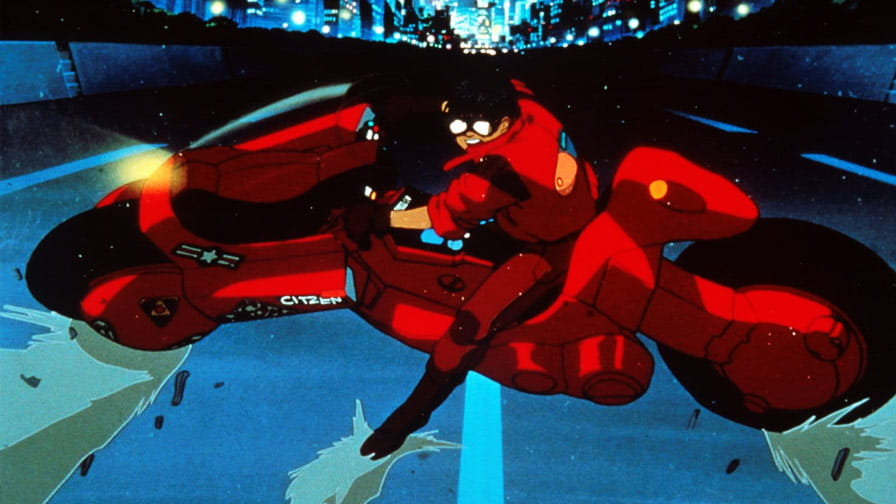

Но что же насчет выгоды? В идеале фильм должен окупить себя в прокате и заработать больше денег!

In [18]:
%timeit links.most_profitable(10)
directors = links.most_profitable(10)
for director in directors.items():
    print(f"{director[0]}: {director[1]/1000000:.2f} млн$")

1.81 ms ± 112 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Парк юрского периода: 1104.38 млн$
Король лев: 979.16 млн$
День независимости: 817.40 млн$
E.T. the Extra-Terrestrial: 797.31 млн$
Звёздные войны: Эпизод 4 - Новая надежда: 775.40 млн$
Форрест Гамп: 678.23 млн$
Звёздные войны. Эпизод 5: Империя наносит ответный удар: 550.02 млн$
Терминатор 2: Судный день: 517.78 млн$
Привидение: 505.70 млн$
Аладдин: 504.05 млн$


Наши любимые мультфильмы, Звездные войны, Форест Гамп - сразу захотелось пересмотреть все это...

По вашему запросу приводим также список самых длинных фильмов.

In [19]:
%timeit links.longest(10)
directors = links.longest(10)
for director in directors.items():
    print(f"{director[0]:20} | {int(director[1]/60)} час {director[1]%60} минут")

1.75 ms ± 3.44 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Унесённые ветром     | 3 час 58 минут
Однажды в Америке    | 3 час 49 минут
Лоуренс Аравийский   | 3 час 47 минут
Бен-Гур              | 3 час 32 минут
Крёстный отец 2      | 3 час 22 минут
Giant                | 3 час 21 минут
Список Шиндлера      | 3 час 15 минут
Парни что надо       | 3 час 13 минут
Никсон               | 3 час 12 минут
Ганди                | 3 час 11 минут


Если вы хотите занять весь вечер просмотром фильма, это отличные варианты для вас!

Вам вероятно всегда было интересно, сколько стоит минута фильма, всего 60 секунд могут обойтись в кругленькую сумму...

In [20]:
%timeit links.top_cost_per_minute(10)
costs = links.top_cost_per_minute(10)
for cost in costs.items():
    print(f"{cost[0]:20} | {cost[1]/1000000:.2f} млн$/мин.")

2.8 ms ± 544 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Акира                | 8.87 млн$/мин.
Призрак в доспехах   | 3.98 млн$/мин.
Холодная лихорадка   | 1.57 млн$/мин.
Водный мир           | 1.30 млн$/мин.
Горбун из Нотр-Дама  | 1.10 млн$/мин.
Жерминаль            | 1.02 млн$/мин.
Судья Дредд          | 0.94 млн$/мин.
Космический джем     | 0.91 млн$/мин.
Стиратель            | 0.87 млн$/мин.
Бэтмен навсегда      | 0.83 млн$/мин.


Опять Акира, но это поражает воображение! Покадровая анимация стоила под 9 милионов долларов за минуту!

Но как насчет самых дешевых фильмов? Всем интересно узнать, какая минимальная сумма нужна для производства своего собственного фильма.

In [21]:
%timeit links.cheapest(10)
costs = links.cheapest(10)
for cost in costs.items():
    print(f"{cost[0]:30} | {cost[1]/1000:.2f} тыс$")

1.71 ms ± 7.01 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Ловись, рыбка                  | 15.00 тыс$
Клерки                         | 27.00 тыс$
Faster, Pussycat! Kill! Kill!  | 45.00 тыс$
The 39 Steps                   | 50.00 тыс$
Федерал Хилл                   | 80.00 тыс$
Night of the Living Dead       | 114.00 тыс$
Что случилось тогда...         | 120.00 тыс$
Седьмая печать                 | 150.00 тыс$
Тусовщица                      | 150.00 тыс$
Белый шар                      | 150.00 тыс$


Полуторачасовая драмма "Ловись, рыбка" - обошлась всего в 15 тысяч долларов, или всего 180 долларов за минуту!

А вот и подробка для тех, у кого совсем не хватает времени! Специально для наших дата-аналитиков!

In [22]:
%timeit links.shortest(10)
shorts = links.shortest(10)
for short in shorts.items():
    print(f"{short[0]:50} | {int(short[1]/60)} час {short[1]%60} минут")

1.79 ms ± 23.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Уоллес и Громит: Великий выходной                  | 0 час 23 минут
Winnie the Pooh and the Blustery Day               | 0 час 25 минут
Некоторые люди называет это отточенным лезвием     | 0 час 25 минут
Уоллес и Громит: Неправильные штаны                | 0 час 29 минут
Уоллес и Громит: Выбрить наголо                    | 0 час 30 минут
A Great Day in Harlem                              | 1 час 0 минут
Дамбо                                              | 1 час 4 минут
Duck Soup                                          | 1 час 9 минут
Рождественский гимн                                | 1 час 9 минут
Nico Icon                                          | 1 час 10 минут


Уоллес и Громит - прекрасные персонажи одноименной серии мультфильмов. Очень советуем глянуть!


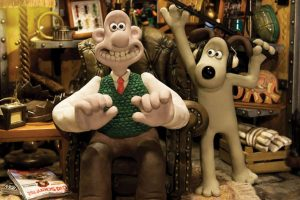

Переходим к финальной части - ваши оценки и рейтинги! И сначала распределение ваших оценок  фильмов в целом:

In [23]:
%timeit movie_rating.dist_by_rating()
dist = movie_rating.dist_by_rating()
for data in dist.items():
    print(f"Рейтинг {data[0]}: {data[1]:3} оценок")

208 μs ± 12.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Рейтинг 0.5:  24 оценок
Рейтинг 1.0:  39 оценок
Рейтинг 1.5:  11 оценок
Рейтинг 2.0:  57 оценок
Рейтинг 2.5:   7 оценок
Рейтинг 3.0: 253 оценок
Рейтинг 3.5:  17 оценок
Рейтинг 4.0: 292 оценок
Рейтинг 4.5:  33 оценок
Рейтинг 5.0: 267 оценок


И не лишним будет указать распределение оценок по годам

In [24]:
%timeit movie_rating.dist_by_year()
dist = movie_rating.dist_by_year()
for data in dist.items():
    print(f"{data[0]}-ый год: {data[1]:3} оценок")

926 μs ± 7.36 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1996-ый год: 358 оценок
1999-ый год:  82 оценок
2000-ый год: 296 оценок
2001-ый год:  70 оценок
2005-ый год: 121 оценок
2006-ый год:   4 оценок
2007-ый год:   1 оценок
2011-ый год:  39 оценок
2015-ый год:  29 оценок


А также вот ТОП-10 самых оцениваемых фильмов.

In [25]:
%timeit movie_rating.top_by_num_of_ratings(10)
dist = movie_rating.top_by_num_of_ratings(10)
for data in dist.items():
    print(f"{data[0]:33} | {data[1]:1} оценок")

376 μs ± 123 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Usual Suspects, The (1995)        | 4 оценок
Pulp Fiction (1994)               | 4 оценок
Fugitive, The (1993)              | 4 оценок
Schindler's List (1993)           | 4 оценок
Batman (1989)                     | 4 оценок
Silence of the Lambs, The (1991)  | 4 оценок
Fargo (1996)                      | 4 оценок
Aladdin (1992)                    | 4 оценок
Beauty and the Beast (1991)       | 4 оценок
Toy Story (1995)                  | 3 оценок


И наконец,  ТОП-10 самых рейтинговых фильмов. Медианные и средние значения рейтинга. 

In [26]:
%timeit movie_rating.top_by_ratings(10, 'average')
dist = movie_rating.top_by_ratings(10, 'average')
for data in dist.items():
    print(f"{data[0]:50} | {data[1]:1} звезд")

603 μs ± 7.35 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Bottle Rocket (1996)                               | 5.0 звезд
Canadian Bacon (1995)                              | 5.0 звезд
Star Wars: Episode IV - A New Hope (1977)          | 5.0 звезд
James and the Giant Peach (1996)                   | 5.0 звезд
Wizard of Oz, The (1939)                           | 5.0 звезд
Citizen Kane (1941)                                | 5.0 звезд
Adventures of Robin Hood, The (1938)               | 5.0 звезд
Mr. Smith Goes to Washington (1939)                | 5.0 звезд
Winnie the Pooh and the Blustery Day (1968)        | 5.0 звезд
Three Caballeros, The (1945)                       | 5.0 звезд


In [27]:
%timeit movie_rating.top_by_ratings(10, 'median')
dist = movie_rating.top_by_ratings(10, 'median')
for data in dist.items():
    print(f"{data[0]:50} | {data[1]:1} звезд")

707 μs ± 8.94 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Bottle Rocket (1996)                               | 5.0 звезд
Canadian Bacon (1995)                              | 5.0 звезд
Star Wars: Episode IV - A New Hope (1977)          | 5.0 звезд
Tommy Boy (1995)                                   | 5.0 звезд
Forrest Gump (1994)                                | 5.0 звезд
Fugitive, The (1993)                               | 5.0 звезд
Jurassic Park (1993)                               | 5.0 звезд
Tombstone (1993)                                   | 5.0 звезд
Dances with Wolves (1990)                          | 5.0 звезд
Pinocchio (1940)                                   | 5.0 звезд


А теперь самые противоречивые фильмы, получившие самые разные оценки пользователей! Укажем дисперсии оценок, полученных ими.

In [28]:
%timeit movie_rating.top_controversial(10)
dist = movie_rating.top_controversial(10)
for data in dist.items():
    print(f"{data[0]:30} | {data[1]:1}")

1.1 ms ± 92.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Bambi (1942)                   | 5.06
Rescuers, The (1977)           | 5.06
My Fair Lady (1964)            | 5.06
Matrix, The (1999)             | 4.0
Schindler's List (1993)        | 3.42
Good Will Hunting (1997)       | 3.06
Courage Under Fire (1996)      | 3.06
Usual Suspects, The (1995)     | 2.42
Dazed and Confused (1993)      | 2.25
Fight Club (1999)              | 2.25


И наконец, ТОП-10 ХУДШИХ фильмов по версии пользователей!

In [29]:
%timeit movie_rating.lowest_rating(10)
dist = movie_rating.lowest_rating(10)
for data in dist.items():
    print(f"{data[0]:55} | {data[1]:1}")

599 μs ± 8.95 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Operation Dumbo Drop (1995)                             | 0.5
Wallace & Gromit: The Best of Aardman Animation (1996)  | 0.5
Doors, The (1991)                                       | 0.5
On Golden Pond (1981)                                   | 0.5
Deer Hunter, The (1978)                                 | 0.5
Patton (1970)                                           | 0.5
Field of Dreams (1989)                                  | 0.5
Lady and the Tramp (1955)                               | 0.5
You've Got Mail (1998)                                  | 0.5
Fast Times at Ridgemont High (1982)                     | 0.5


Мы узнали, что средний пользователь оставляет от 1 до 6 оценок, вот более точное распределение пользователей по количеству их оценок.

In [30]:
%timeit user_rating.dist_by_count()
dist = user_rating.dist_by_count()
print("Кол-во оценок | Кол-во пользователей")
print("------------------------------------")
for data in dist.items():
    print(f"{data[0]:13} | {data[1]:1}")

195 μs ± 7.54 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Кол-во оценок | Кол-во пользователей
------------------------------------
            6 | 314
            1 | 232
            4 | 216
            7 | 126
            5 | 44
            3 | 39
            2 | 29


А вот распределение средниз оценок пользователей по разным метрикам

In [31]:
%timeit user_rating.dist_by_rating('average')
dist = user_rating.dist_by_rating('average')
print("Средняя оценка | Кол-во пользователей")
print("------------------------------------")
for data in dist.items():
    print(f"{data[1]:14} | {data[0]:1}")

169 μs ± 1.61 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Средняя оценка | Кол-во пользователей
------------------------------------
          4.37 | 1
          3.95 | 2
          3.64 | 5
          3.56 | 4
          3.49 | 6
          3.35 | 7
          2.44 | 3


In [32]:
%timeit user_rating.dist_by_rating('median')
dist = user_rating.dist_by_rating('median')
print("Средняя оценка | ID пользователя")
print("------------------------------------")
for data in dist.items():
    print(f"{data[1]:14} | {data[0]:1}")

211 μs ± 3.28 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Средняя оценка | ID пользователя
------------------------------------
           5.0 | 1
           4.0 | 2
           4.0 | 4
           4.0 | 5
           4.0 | 7
           3.0 | 6
           0.5 | 3


И наконец, самые строги критики, оценки которых имеют самый большой разброс

In [34]:
%timeit user_rating.top_by_variance(5)
dist_test = user_rating.top_by_variance(5)
print("Пользователь                       | Дисперсия")
print("----------------------------------------------")
for user, dispersion in dist_test.items():
    print(f"{user:34} | {dispersion:1}")


281 μs ± 6.67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Пользователь                       | Дисперсия
----------------------------------------------
3                                  | 4.26
4                                  | 1.72
7                                  | 1.65
5                                  | 0.96
6                                  | 0.72
